### `About Gradient & Derivatives`
- Gradient descent algorithm is an optimisation algorithm that uses to find the optimal value of parameters that minimises loss function.
- For instance, the algorithm iteratively adjusts the parameters such as weights and biases of the neural network to find the optimal parameters that minimise the loss function. 
- `A partial derivative of a function of multi variables is its derivative with respect to one of those variables, with the others held constant`. 
  - ![](readme_images/Partial_Derivative_Func_w.r.t_x.png)
  - ![](readme_images/Partial_Derivative_Func_w.r.t_y.png)
  - ![](readme_images/Gradient_Derivatives.png)
- It gives the `rate of change of a function in the direction of a variable`.
- It can determine how changes in the direction of a variable influence the function
- Consider the multivariable function f(x, y) = xy²+x³. We can find partial derivatives of the function that is derivatives of function wrt to each variable x and y(a bit of calculus knowledge required to compute the partial derivatives).
- Intuitively, a derivative of a function is the slope of the tangent line that gives a rate of change in a given point as shown above. If the function is higher-dimensional we have to find the partial derivatives to find the rate of change of the function at a given point. 
- ` In higher dimension, a gradient is a vector that contains partial derivatives to determine the rate of change. In a higher dimensional function, We can consider gradient as the slope`.
- `In a lower-dimensional function, the gradient is a slope of the tangent line that determines the rate of change at a given point.`
  - `Slope measurse both the direction and the steepness of the line`
- The `gradient` gives the direction of the maximum change and the magnitude indicates the `maximum rate of change`. The gradient always points in the direction of the steepest increase in the objective function.   
- If we update variables or parameters of some cost function in the direction of the negative gradient in an iterative manner to reach the minimum of some cost function is called `gradient descent algorithm`.

### `Gradient Descent as per - Linear Regression`
- 1. Initialise the coefficients m and b with random values
  - For example m = 1 and b =2, i.e a line equation is y = mx+b, then y = 1*x+2
- 2. Calculate / compute gardient
  - We use the `Sum of Squared Errors (SSE) as our loss / cost function` to minimise the prediction error. In this case, the gradient of SSE is a partial derivative of SSE w.r.t m and partial derivative of SSE w.r.t b.
  - In the first step, we initialize m and b with random values. For the subsequent iterative process, m and b values are updated using step 3. In this step, we compute the partial derivative of SSE w.r.t m and partial derivative w.r.t b using the above equation for each data point in X. Finally, calculate the sum of all partial derivatives f w.r.t m and all partial derivatives f w.r.t b. In other words, `we compute the gradient of SSE for the data X`.
- 3. Update coefficients in the direction of optimal m and b
  - We can update the coefficients m and b using the gradient calculated from the above equations
  - ![](readme_images/SSE.png)
  - ![](readme_images/SSE_Derivatives_w.r.t_x&_y.png)
  - ![](readme_images/SSE_Gradient.png)
- 4. Use new m and b for prediction
  - We use the data X with new m and b, computed in the above step, to draw the line that fit the data. 
  - ![](readme_images/Update_Weights_Using_Gradient_Derivatives.png)
  - We calculate the SSE of each data point in X to find out the total SSE, which is a sum of squared errors of data 
  points, divided of 2. The total SSE indicates the error rate of the model prediction.
  - ![](readme_images/Total_SSE.png)
- 5. Repeat steps 2, 3 and 4
  - ![](readme_images/Gradient_Plot.png)
  - ![](readme_images/Optimal_Coefficients.png)

### `Observation`
  - `Derivatives` gives the `rate of the change / slope / direction information of the function`.
  - Here, function we are choosing is `Cost function - that checks difference between actuals & predictions`
    - x = Regresion weights
    - y = function(x) = SSE output
  - Based on initial random Regression weights(x). We check SSE, if it is high means, derivatives [rate of the change / slope of the function(SSE)] is high too. But we want to reduce it.
    - Because SSE[High] - Means high prediction error, poor predictions
    - SSE[High] - Means low prediction error, good predictions
  - So, we use this present rate of change information(i.e., derivatives) for getting better weights(i.e., to get less SSE) again using above computation formula.
  - Again we check the SSE now, if derivatives [rate of the change / slope / direction of the function] is still high, we again we use latest rate of change information(i.e., derivatives) into getting better weights computation. We do this untill we get less SSE value.
  - **`In short, derivatives[high dimension - Gradient] gives us better idea, about slope / how much the rate of change / direction of the cost function is. If it is high[weights are bad], if it is less[weights are good]. This is how derivatives / gradient used in getting better weights for Regression`**

### `Import Libraries`

In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

### `Sample Data`

In [2]:
companya_sales_data = """
Product_Sell,Revenue_Generation
10,1000
15,1400
18,1800
22,2400
26,2600
30,2800
5,700
31,2900
"""

df = pd.read_table(StringIO(companya_sales_data), sep=",")
display(HTML(df.to_html()))

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


In [10]:
def mean_squared_error(y_true, y_predicted):
    ''' 
    This function calculates the Loss / Cost function value 
    '''
    cost_func_value = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost_func_value

def gradient_descent(x, y, iterations = 100, learning_rate = 0.00001, threshold_limit = 1e-6):
    ''' 
    This function calculates gradient_descent
    Regression Function : y = mx + c
    Intialises some random weights
    Cost / Loss Function : Mean Squared Error
    Finds partial derivative of cost function(mean squared error) w.r.t m(slope/ x regression coefficient)
    Finds partial derivative of cost function(mean squared error) w.r.t c(constant / intercept / bias)
    Updated Weights with hyperparameters, iterations, threshold_limit(where we think regression weights are good)
    '''
    ##### Initialise #####
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None
    ##### Estimation of optimal parameters #####
    for i in range(iterations):
        ##### Predictions based on Reg.coefficients & constant values #####
        y_predicted = (current_weight * x) + current_bias
        ##### Calculate Loss/Cost value #####
        current_cost = mean_squared_error(y, y_predicted)
        '''
        If the difference between prev iteration cost & present iteration are nearly equal(i.e., given in threshold_limit) then stop refining regression coefficients
        '''
        if previous_cost and abs(previous_cost-current_cost)<=threshold_limit:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        ##### Calculating the gradients #####
        # Finding partial derivative of cost function(mean squared error) w.r.t m(slope/ x regression coefficient)
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        # Finding partial derivative of cost function(mean squared error) w.r.t c(constant / intercept / bias)
        bias_derivative = -(2/n) * sum(y-y_predicted)
        ##### Updating weights and bias #####
        # Trying to reduce rate of change value in cost function w.r.t weights i.e., internally means making coefficient reduce its affect in cost function 
        current_weight = current_weight - (learning_rate * weight_derivative)
        # Trying to reduce rate of change value in cost function wr.t. bias i.e., internally means making constant reduce its affect in cost function 
        current_bias = current_bias - (learning_rate * bias_derivative)
        ##### Parameters on each iteration #####
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")
    ##### Visualizing the weights and cost at for all iterations #####
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    return current_weight, current_bias
  
  
def main(iterations):      
    ##### Independent & Dependent Variables #####
    X = np.array(df.loc[:len(df)-3]["Product_Sell"].tolist())
    Y = np.array(df.loc[:len(df)-3]["Revenue_Generation"].tolist())
    print("X --> ", X)
    print("Y --> ", Y)
    ##### Estimating Regression Coefficient and Constant using Gradient Descent #####
    coeff, constant = gradient_descent(X, Y, iterations)
    print(f"Estimated Weight: {coeff}\nEstimated Bias: {constant}")
    ##### Making predictions using estimated parameters #####
    Y_pred = coeff*X + constant
    ##### Plotting the regression line #####
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='blue')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='orange',markerfacecolor='orange', markersize=10,linestyle='dashed', label="Prediction")
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    plt.show()

### `Regression Parameters with Gradient Descent : Iterations = 100`

X -->  [10 15 18 22 26 30]
Y -->  [1000 1400 1800 2400 2600 2800]
Iteration 1: Cost 4417704.555433333, Weight 0.9917596333333334, Bias 0.049959466666666674
Iteration 2: Cost 4338381.842728342, Weight 1.8754505601927778, Bias 0.08955845775855556
Iteration 3: Cost 4260488.062969568, Weight 2.751145786389608, Bias 0.128800234863456
Iteration 4: Cost 4183997.475113472, Weight 3.6189176571771147, Bias 0.16768803005824823
Iteration 5: Cost 4108884.801820094, Weight 4.478837863227349, Bias 0.20622504617591897
Iteration 6: Cost 4035125.2210998195, Weight 5.330977446553781, Bias 0.2444144570701604
Iteration 7: Cost 3962694.358110614, Weight 6.175406806380383, Bias 0.28225940787757564
Iteration 8: Cost 3891568.27710304, Weight 7.01219570495759, Bias 0.31976301527751133
Iteration 9: Cost 3821723.473510357, Weight 7.841413273325662, Bias 0.35692836774953957
Iteration 10: Cost 3753136.866181133, Weight 8.663128017025873, Bias 0.3937585258286099
Iteration 11: Cost 3685785.789751753, Weight 9.4774078

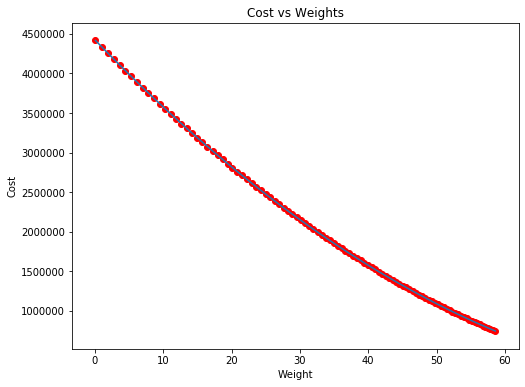

Estimated Weight: 58.9432990598647
Estimated Bias: 2.650811627789195


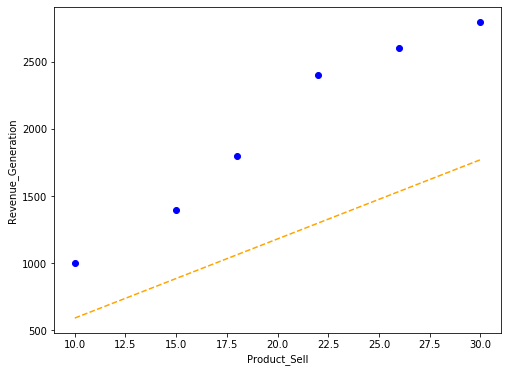

In [11]:
if __name__=="__main__":
    main(iterations=100)

### `Observation`
  - In first plot still cost is high in 100 iterations, means lot of errors in our predictions. That can be related with the help of 2nd plot, where we can see our predicted regression line is far from actual data points.

### `Regression Parameters with Gradient Descent : Iterations = 2000`

X -->  [10 15 18 22 26 30]
Y -->  [1000 1400 1800 2400 2600 2800]
Iteration 1: Cost 4417704.555433333, Weight 0.9917596333333334, Bias 0.049959466666666674
Iteration 2: Cost 4338381.842728342, Weight 1.8754505601927778, Bias 0.08955845775855556
Iteration 3: Cost 4260488.062969568, Weight 2.751145786389608, Bias 0.128800234863456
Iteration 4: Cost 4183997.475113472, Weight 3.6189176571771147, Bias 0.16768803005824823
Iteration 5: Cost 4108884.801820094, Weight 4.478837863227349, Bias 0.20622504617591897
Iteration 6: Cost 4035125.2210998195, Weight 5.330977446553781, Bias 0.2444144570701604
Iteration 7: Cost 3962694.358110614, Weight 6.175406806380383, Bias 0.28225940787757564
Iteration 8: Cost 3891568.27710304, Weight 7.01219570495759, Bias 0.31976301527751133
Iteration 9: Cost 3821723.473510357, Weight 7.841413273325662, Bias 0.35692836774953957
Iteration 10: Cost 3753136.866181133, Weight 8.663128017025873, Bias 0.3937585258286099
Iteration 11: Cost 3685785.789751753, Weight 9.4774078

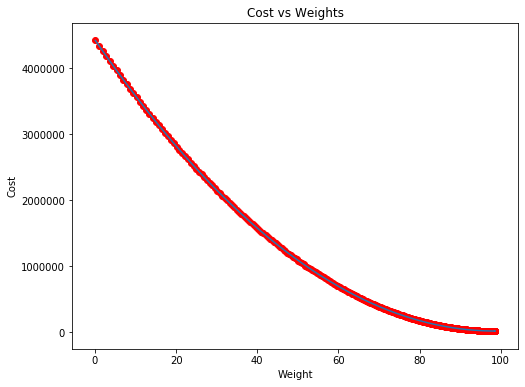

Estimated Weight: 98.64850393232676
Estimated Bias: 4.651164970903101


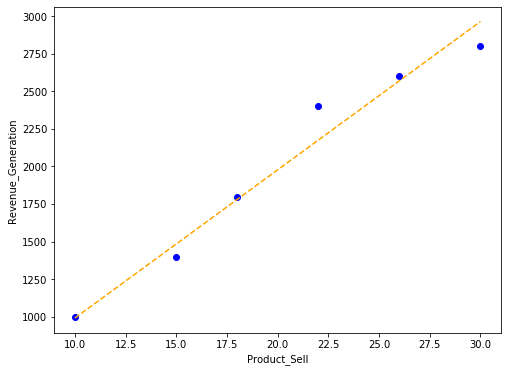

In [12]:
if __name__=="__main__":
    main(iterations=2000)

### `Observation`
  - Now, in first plot we can see cost is reduced approx. to 0 with help of 2000 iterations, means errors are reduced in our predictions. That can be related with the help of 2nd plot, where we can see our predicted regression line is now very near to actual data points.

- Reference Source Articles
  - `https://medium.com/intro-to-artificial-intelligence/gradient-descent-algorithm-explained-with-linear-regression-example-ff6b5491fdb9`
  - `https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/`